In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
from astropy import time as aptime

In [4]:
fdir = '/data2/GBT/S140/'

In [5]:
fnamesA = glob.glob(fdir+'Daisy/*/*_03_*A*rfireduced.npz')
fnamesA.sort()
print len(fnamesA)

24


In [6]:
fdiode, pdiode = np.load('lownoise_calibration_3C295_03_A.npy')

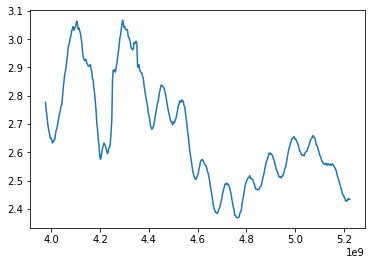

In [7]:
plot(fdiode, pdiode)

In [8]:
fnamesA

['/data2/GBT/S140/Daisy/scan_03_008.raw.vegas/scan_03_008.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_009.raw.vegas/scan_03_009.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_010.raw.vegas/scan_03_010.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_011.raw.vegas/scan_03_011.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_012.raw.vegas/scan_03_012.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_013.raw.vegas/scan_03_013.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_014.raw.vegas/scan_03_014.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_015.raw.vegas/scan_03_015.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_016.raw.vegas/scan_03_016.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_017.raw.vegas/scan_03_017.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/S140/Daisy/scan_03_018.raw.vegas/scan_03_018.raw.vegas.A.fits.rfire

In [9]:
nz = np.load(fnamesA[5])
mask = nz['valid']
nz['xxoff'].shape
calibd = (nz['xxoff'] * pdiode / (nz['xxon'] - nz['xxoff']))[:,mask]
ts = aptime.Time(nz['DATE-OBS'][::8], format='isot', scale='utc').unix
ele = nz['ELEVATIO'][::8]

In [10]:
calibd.shape

(7081, 427)

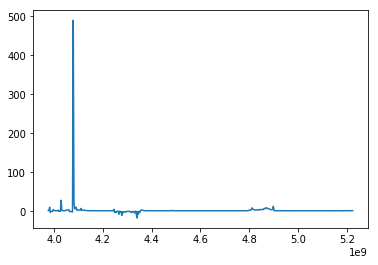

In [11]:
plot(nz['freqs'][mask], calibd.max(0) / calibd.min(0))

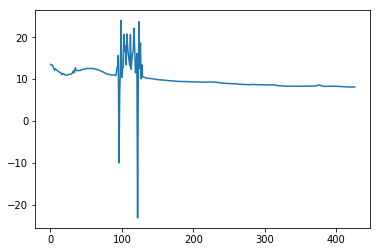

In [12]:
plot(np.nanmean(calibd, 0))

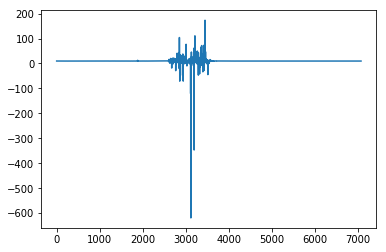

In [13]:
plot(np.nanmean(calibd, 1))

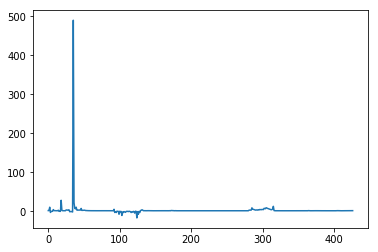

In [14]:
plot(calibd.max(0) / calibd.min(0))

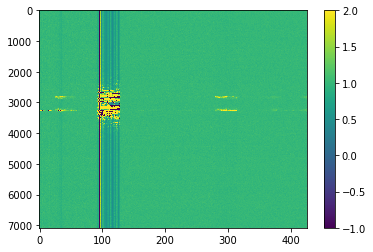

In [34]:
imshow(calibd / calibd.mean(0), aspect='auto')
colorbar()
clim([-1, 2])

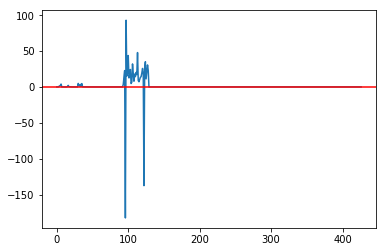

In [16]:
plot(calibd.std(0) / np.mean(calibd, 0))
axhline(18 * 0.00295, color='r')
#ylim([-1, 1])

In [25]:
mask = np.abs((calibd.std(0) / np.mean(calibd, 0))) > 18 * mad(calibd.std(0) / np.mean(calibd, 0))

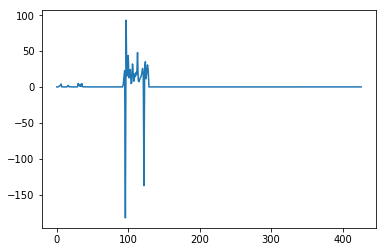

In [24]:
plot((calibd.std(0) / np.mean(calibd, 0)))

In [19]:
print np.std(calibd.std(0) / np.mean(calibd, 0))

13.3269536265


In [20]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [21]:
mad(calibd.std(0) / np.mean(calibd, 0))

0.0029250004147629884

In [42]:
mask.shape

(427,)

In [43]:
calibd.shape

(7081, 427)

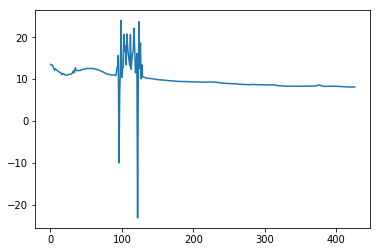

In [35]:
plot(np.nanmean(calibd, 0))

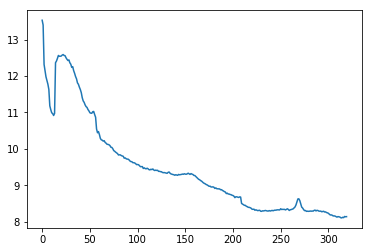

In [36]:
plot(np.nanmean(calibd[:,~mask], 0))

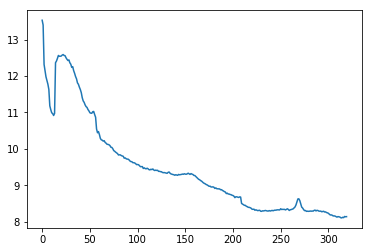

In [44]:
plot(np.nanmean(calibd[:,~mask], 0))

In [45]:
bigmask = np.broadcast_to(mask, calibd.shape)

In [46]:
calibd[bigmask] = np.nan

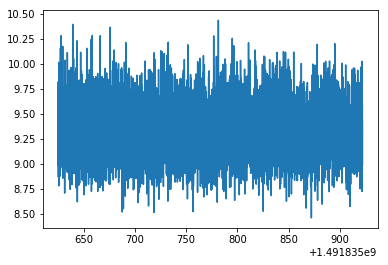

In [48]:
plot(ts, calibd[:, 200])

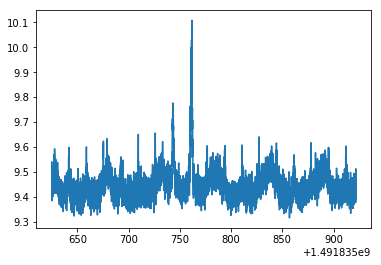

In [53]:
plot(ts, np.nanmean(calibd, 1))

In [55]:
calibratedA = [] 
ras = []
decs = []
gains = []
eles = []
times = []
for fname in fnamesA:
    nz = np.load(fname)
    ra = nz['sra']
    dec = nz['sdec']
    mask = nz['valid']
    ele = nz['ELEVATIO'][::8]
    ts = aptime.Time(nz['DATE-OBS'][::8], format='isot', scale='utc').unix
    calibd = (nz['xxoff'] * pdiode / (nz['xxon'] - nz['xxoff']))[:,mask]
    nmask = np.abs((calibd.std(0) / np.mean(calibd, 0))) > 18 * mad(calibd.std(0) / np.mean(calibd, 0))
    bigmask = np.broadcast_to(nmask, calibd.shape)
    calibd[bigmask] = np.nan
    calib = np.nanmean(calibd, 1)
    calibratedA = np.concatenate([calibratedA, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    eles = np.concatenate([eles, ele])
    times = np.concatenate([times, ts])

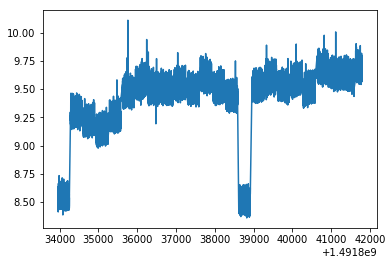

In [56]:
plot(times, calibratedA)

In [12]:
nz['TIMESTAMP']

array(['2017_04_10_14:19:16   '], 
      dtype='|S22')

In [17]:
len(nz['DATE-OBS']) / 8

7081

In [16]:
len(nz['xxon'])

7081

In [49]:
nz['LST']

array([ 81829.16704307,  81829.16704307,  81829.16704307, ...,
        82126.93680692,  82126.93680692,  82126.93680692])

In [18]:
nz['DATE-OBS'][::8]

array(['2017-04-10T14:19:16.00', '2017-04-10T14:19:16.04',
       '2017-04-10T14:19:16.09', ..., '2017-04-10T14:24:12.88',
       '2017-04-10T14:24:12.92', '2017-04-10T14:24:12.96'], 
      dtype='|S22')

In [36]:
times = aptime.Time(nz['DATE-OBS'][::8], format='isot', scale='utc').unix

In [37]:
print np.diff(times[:10])

[ 0.03999996  0.04999995  0.03999996  0.03999996  0.0400002   0.03999972
  0.05000019  0.03999996  0.03999972]


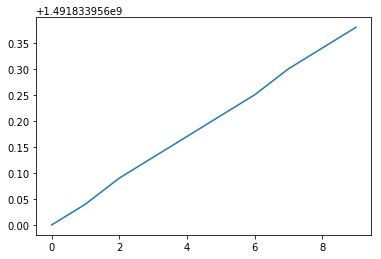

In [38]:
plot(times[:10])